# Stock Market Analysis for Tech Giants
In this project, we will analyze data from Yahoo Finance of three of the popular tech stocks to date.

We will use Pandas to extract and analyze information, visulaize it, analyze risks based of it's performance history.

Here are questions we will try to answer:

1. What was the change of price over time?
2. What was the daily return on average of a stock?
3. What was the moving average of various stock?
4. What is the correlation between daily returns of different stock?
5. How much value do we put at risk by investing in a stock?
6. How can we attempt to predict future stock behavior?

In [1]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

Let us now create a future lists of stock names for future looping.

In [2]:
#We are going to analyze the top three tech giants.
tg_list = ['AAPL','MSFT','GOOG']

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
#using yahoo finance to grab crytocurrency data
for tg in tg_list:
    globals()[tg] = pdr.DataReader(tg,'yahoo',start,end)

In [5]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800.0,56.194942


In [6]:
#STATISTICS FOR APPLE'S STOCK
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,81.701404,79.487440,80.558426,80.690050,1.358957e+08,80.383796
std,19.113346,18.237202,18.870416,18.657508,5.572540e+07,18.808401
min,55.240002,53.152500,54.607498,54.740002,4.661760e+07,54.202213
25%,67.000000,65.716251,66.389999,66.557503,9.669660e+07,66.177383
50%,77.587502,75.555000,76.127502,77.165001,1.256428e+08,76.774071
75%,91.667500,89.511250,90.993752,91.027496,1.654970e+08,90.863670
max,137.979996,130.529999,137.589996,134.179993,3.743368e+08,134.179993


In [7]:
#INFORMATION ABOUT APPLE DATAFRAME
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-09-30 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


## What is the change in stock's price over time?

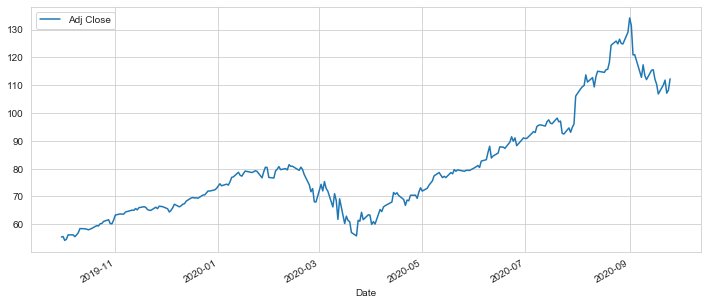

In [8]:
#Using pandas we canplot the stocks adjusted closing price
AAPL['Adj Close'].plot(legend = True, figsize=(12,5))

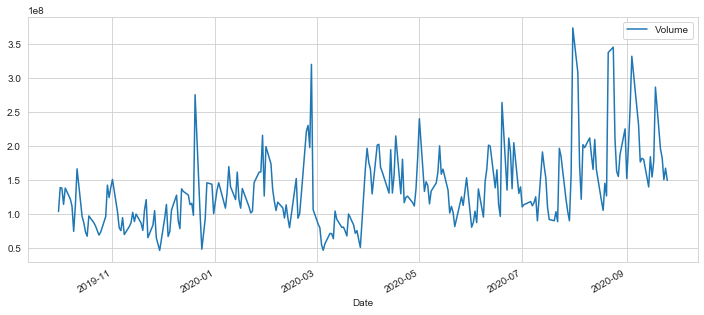

In [9]:
#Using pandas once more to plot the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

## What was the moving average of the stocks?

In [10]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002,112.591999,119.470123,110.799743
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998,112.490999,118.767748,111.129829
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,107.120003,111.470999,117.882499,111.334573
2020-09-24,110.250000,105.000000,105.169998,108.220001,167743300.0,108.220001,110.943999,116.967374,111.547991
2020-09-25,112.440002,107.669998,108.430000,112.279999,149736300.0,112.279999,110.971999,116.330873,111.866615


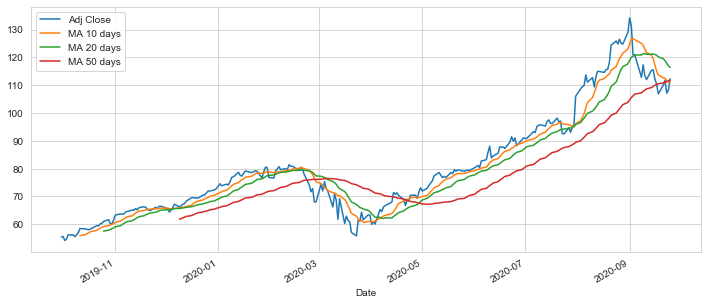

In [12]:
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

Genereally some casual dips in July and October but overall an upward trend.

## What was the daily return average of a stock?

In [13]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].tail()

Date
2020-09-21    0.030326
2020-09-22    0.015716
2020-09-23   -0.041946
2020-09-24    0.010269
2020-09-25    0.037516
Name: Daily Return, dtype: float64

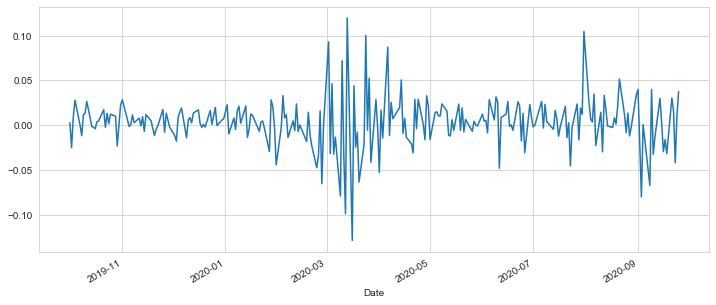

In [14]:
#Let us now plot the daily return
AAPL['Daily Return'].plot(figsize=(12,5))

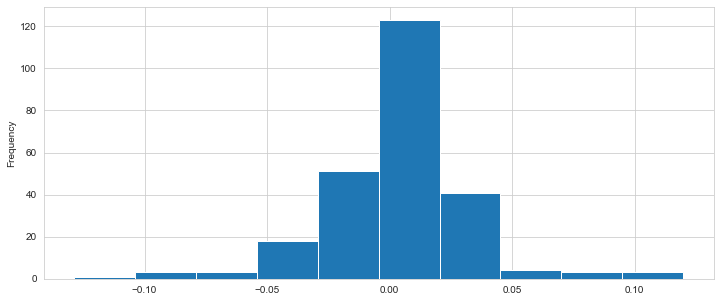

In [15]:
AAPL['Daily Return'].plot(kind='hist',figsize=(12,5))

Positive daily returns seem to be more frequent than negative returns.

## What was the correlation between daily returns of different stocks?

In [16]:
#Let's read the 'Adj Close' column from all the tech giants

close_df = pdr.DataReader(tg_list,'yahoo',start,end)['Adj Close']

In [17]:
close_df.tail()

Symbols,AAPL,MSFT,GOOG
Date,,,
2020-09-22,111.809998,207.419998,1465.459961
2020-09-23,107.120003,200.589996,1415.209961
2020-09-24,108.220001,203.190002,1428.290039
2020-09-25,112.279999,207.820007,1444.959961
2020-09-28,113.410400,210.369995,1468.510010


In [18]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_df.pct_change()

In [19]:
returns_df.tail()

Symbols,AAPL,MSFT,GOOG
Date,,,
2020-09-22,0.015716,0.024094,0.023967
2020-09-23,-0.041946,-0.032928,-0.034290
2020-09-24,0.010269,0.012962,0.009243
2020-09-25,0.037516,0.022787,0.011671
2020-09-28,0.010068,0.012270,0.016298


C:\Users\wikie\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


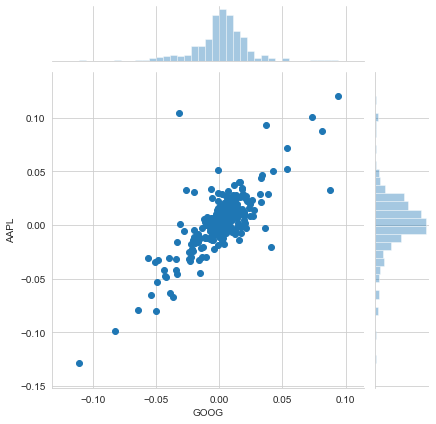

In [20]:
#We can now try to find the correlation between Apple and Google
sns.jointplot('GOOG','AAPL',returns_df,kind='scatter')

There seems to be a minor positive correlation between the two, the pearsonr correlation coefficient value of 0.5 agrees with that statement.

Let's use a pairplot to visualize all the tech giants in one view.

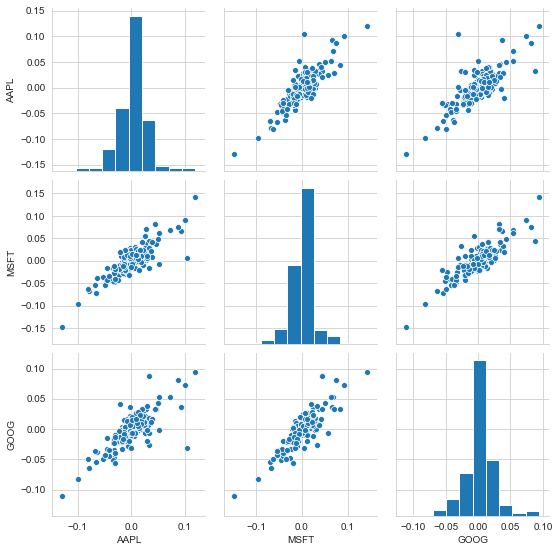

In [21]:
sns.pairplot(returns_df.dropna())

Quick and easy way to view correlations but let's use a correlation plot to see the actual numbers.

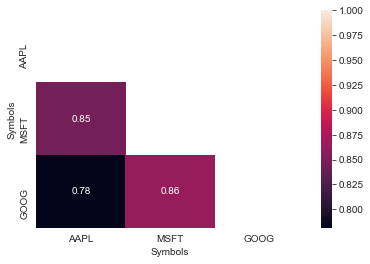

In [22]:
corr = returns_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True,mask=mask)